# Statement 2 - Employee Survey Topic Modelling

In [690]:
#Import statements
import numpy as np # linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer #CountVectorizer Bag of Words
from umap import UMAP #UMAP Dimensionality Reduction
from bertopic import BERTopic #Topic Modelling
from sentence_transformers import SentenceTransformer

In [691]:
#Import data for statement 2
data = pd.read_excel(r"..\..\masds002\DS2-assessment-Simulated-Employee-Feedback.xlsx")
data.head()

,unique_identifier,employee_feedback,department
0,3565,There's a culture of blame within the company ...,Dept A
1,7323,The company's approach to feedback and perform...,Dept A
2,5008,"While page limits have been set, some departme...",Dept A
3,3460,na,Dept A
4,2179,The culture of collaboration within our team i...,Dept A


In [692]:
data[data["employee_feedback"].str.lower() == "n.a"]

,unique_identifier,employee_feedback,department
62,3885,N.A,Dept C


In [693]:
len(data)

155

In [694]:
data = data.drop(data[(data['employee_feedback'].str.lower() == "na") | 
                          (data['employee_feedback'].str.lower().str.strip() == "n.a.") |
                          (data['employee_feedback'].str.lower() == "none") |
                          (data['employee_feedback'].str.lower().str.strip() == "nil") |
                          (data['employee_feedback'].str.lower() == "no") |
                          (data['employee_feedback'].str.lower() == "nil.") |
                          (data['employee_feedback'].str.lower() == "na.") |
                          (data['employee_feedback'].str.lower() == "n.a.") |
                          (data['employee_feedback'].str.lower() == "md") |
                          (data['employee_feedback'].str.lower() == "-") |
                          (data['employee_feedback'].str.lower() == "--")].index).reset_index()

In [695]:
len(data)

144

In [696]:
data[data["employee_feedback"].str.lower() == "na."]

,index,unique_identifier,employee_feedback,department


In [697]:
#data[data["employee_feedback"] == np.NaN]

In [698]:
docs = data["employee_feedback"]
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

In [699]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,132,0_and_to_the_is,"[and, to, the, is, more, my, work, be, are, in]",[A few points:\n - The company's culture is ge...
1,1,12,1_good_na_hear_wfh,"[good, na, hear, wfh, many, comments, no, be, ...","[No comments., Good, good to be hear]"


In [700]:
topic_model.get_topic(1)

[('good', 1.0881586029589583),
 ('na', 0.7516433302915633),
 ('hear', 0.7516433302915633),
 ('wfh', 0.6823830044044377),
 ('many', 0.6823830044044377),
 ('comments', 0.6823830044044377),
 ('no', 0.6131769820113188),
 ('be', 0.3630720539940404),
 ('to', 0.2628007493428674),
 ('', 1e-05)]

In [701]:
topic_model.get_document_info(docs)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,There's a culture of blame within the company ...,0,0_and_to_the_is,"[and, to, the, is, more, my, work, be, are, in]",[A few points:\n - The company's culture is ge...,and - to - the - is - more - my - work - be - ...,1.000000,False
1,The company's approach to feedback and perform...,0,0_and_to_the_is,"[and, to, the, is, more, my, work, be, are, in]",[A few points:\n - The company's culture is ge...,and - to - the - is - more - my - work - be - ...,0.962069,False
2,"While page limits have been set, some departme...",0,0_and_to_the_is,"[and, to, the, is, more, my, work, be, are, in]",[A few points:\n - The company's culture is ge...,and - to - the - is - more - my - work - be - ...,1.000000,False
3,The culture of collaboration within our team i...,0,0_and_to_the_is,"[and, to, the, is, more, my, work, be, are, in]",[A few points:\n - The company's culture is ge...,and - to - the - is - more - my - work - be - ...,1.000000,False
4,While the workload can be overwhelming at time...,0,0_and_to_the_is,"[and, to, the, is, more, my, work, be, are, in]",[A few points:\n - The company's culture is ge...,and - to - the - is - more - my - work - be - ...,1.000000,False
...,...,...,...,...,...,...,...,...
139,Our documentation is thorough. Onboarding new ...,0,0_and_to_the_is,"[and, to, the, is, more, my, work, be, are, in]",[A few points:\n - The company's culture is ge...,and - to - the - is - more - my - work - be - ...,1.000000,False
140,Feedback flows freely. Suggestions to improve ...,0,0_and_to_the_is,"[and, to, the, is, more, my, work, be, are, in]",[A few points:\n - The company's culture is ge...,and - to - the - is - more - my - work - be - ...,0.980237,False
141,Our team leads by example. The standards they ...,0,0_and_to_the_is,"[and, to, the, is, more, my, work, be, are, in]",[A few points:\n - The company's culture is ge...,and - to - the - is - more - my - work - be - ...,1.000000,False
142,Cross-training and job shadowing help broaden ...,0,0_and_to_the_is,"[and, to, the, is, more, my, work, be, are, in]",[A few points:\n - The company's culture is ge...,and - to - the - is - more - my - work - be - ...,1.000000,False


In [702]:
from ctransformers import AutoModelForCausalLM
from transformers import AutoTokenizer, pipeline

# Set gpu_layers to the number of layers to offload to GPU. Set to 0 if no GPU acceleration is available on your system.
model = AutoModelForCausalLM.from_pretrained(
    "TheBloke/zephyr-7B-alpha-GGUF",
    model_file="zephyr-7b-alpha.Q4_K_M.gguf",
    model_type="mistral",
    gpu_layers=50,
    hf=True
)
tokenizer = AutoTokenizer.from_pretrained("HuggingFaceH4/zephyr-7b-alpha")

# Pipeline
generator = pipeline(
    model=model, tokenizer=tokenizer,
    task='text-generation',
    max_new_tokens=50,
    repetition_penalty=1.3
)

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

In [703]:
prompt = """<|system|>You are a helpful, respectful and honest assistant for labeling topics..</s>
<|user|>
I have a topic that contains the following documents:
[DOCUMENTS]

The topic is described by the following keywords: '[KEYWORDS]'.

Based on the information about the topic above, please describe the profile of the employees. Make sure you describe the
profile of the employees only using the documents and keywords above.</s>
<|assistant|>"""

In [704]:
from bertopic.representation import TextGeneration

# Text generation with Zephyr
zephyr = TextGeneration(generator, prompt=prompt)
representation_model = {"Zephyr": zephyr}

In [705]:
vectorizer_model = CountVectorizer(stop_words="english")
#sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
sentence_model = SentenceTransformer("all-mpnet-base-v2")
#embeddings = sentence_model.encode(docs, show_progress_bar=False)
umap_model = UMAP(n_neighbors=3, n_components=5, min_dist=0.0, metric='cosine',random_state=42)
topic_model = BERTopic(vectorizer_model=vectorizer_model,min_topic_size=5, 
                       umap_model=umap_model,embedding_model=sentence_model,representation_model=representation_model)
topics, probs = topic_model.fit_transform(docs)

Number of tokens (700) exceeded maximum context length (512).
Number of tokens (701) exceeded maximum context length (512).
Number of tokens (702) exceeded maximum context length (512).
Number of tokens (703) exceeded maximum context length (512).
Number of tokens (704) exceeded maximum context length (512).
Number of tokens (705) exceeded maximum context length (512).
Number of tokens (706) exceeded maximum context length (512).
Number of tokens (707) exceeded maximum context length (512).
Number of tokens (708) exceeded maximum context length (512).
Number of tokens (709) exceeded maximum context length (512).
Number of tokens (710) exceeded maximum context length (512).
Number of tokens (711) exceeded maximum context length (512).
Number of tokens (712) exceeded maximum context length (512).
Number of tokens (713) exceeded maximum context length (512).
Number of tokens (714) exceeded maximum context length (512).
Number of tokens (715) exceeded maximum context length (512).
Number o

In [706]:
topic_model.get_topic_info().to_csv("results.csv")
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Zephyr,Representative_Docs
0,-1,8,-1_giving_questions_leadership_positive,"[giving, questions, leadership, positive, envi...",[\nEmployees at this company value both enviro...,[The open-door policy of the management and th...
1,0,32,0_team_collaboration_work_sense,"[team, collaboration, work, sense, shared, mem...",[\nEmployees in this context are highly collab...,[Information is shared transparently on my tea...
2,1,25,1_feel_career_opportunities_job,"[feel, career, opportunities, job, manager, sk...",[\nTopic Label |>\n1staffairs>\nLabel|>\nPotp>...,[The company's commitment to professional deve...
3,2,21,2_company_day_difficult_feel,"[company, day, difficult, feel, lack, trust, c...",[\nTopic:\n1|>\nLabel|>\nTitle:\nPossistant|>\...,[There's a lack of transparency within the com...
4,3,17,3_valued_company_recognition_work,"[valued, company, recognition, work, diverse, ...",[\nEmployees who value and recognize the impor...,[I appreciate the company's efforts to foster ...
5,4,13,4_investment_benefits_company_package,"[investment, benefits, company, package, healt...",[\nEmployees working with this company may exp...,[While the company offers competitive compensa...
6,5,12,5_work_balance_workload_life,"[work, balance, workload, life, hours, availab...",[\nEmployees in this context seem to vary wide...,[While the workload can be overwhelming at tim...
7,6,9,6_good_hear_wfh_comments,"[good, hear, wfh, comments, , , , , , ]","[\nFrom the given materials, it can be inferre...","[No comments., Good, good to be hear]"
8,7,7,7_feedback_reviews_performance_helpful,"[feedback, reviews, performance, helpful, year...",[\nEmployees at this company value constructiv...,[The company's approach to feedback and perfor...


In [707]:
# vectorizer_model = CountVectorizer(stop_words="english")
# #sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
# sentence_model = SentenceTransformer("all-mpnet-base-v2")
# #embeddings = sentence_model.encode(docs, show_progress_bar=False)
# umap_model = UMAP(n_neighbors=3, n_components=5, min_dist=0.0, metric='cosine',random_state=42)
# topic_model = BERTopic(vectorizer_model=vectorizer_model,min_topic_size=5, umap_model=umap_model,embedding_model=sentence_model)
# topics, probs = topic_model.fit_transform(docs)
# topic_model.get_topic_info()

In [708]:
# topic_model.visualize_topics()

In [709]:
topic_model.visualize_heatmap()

In [710]:
# Run the visualization with the original embeddings
topic_model.visualize_documents(docs)

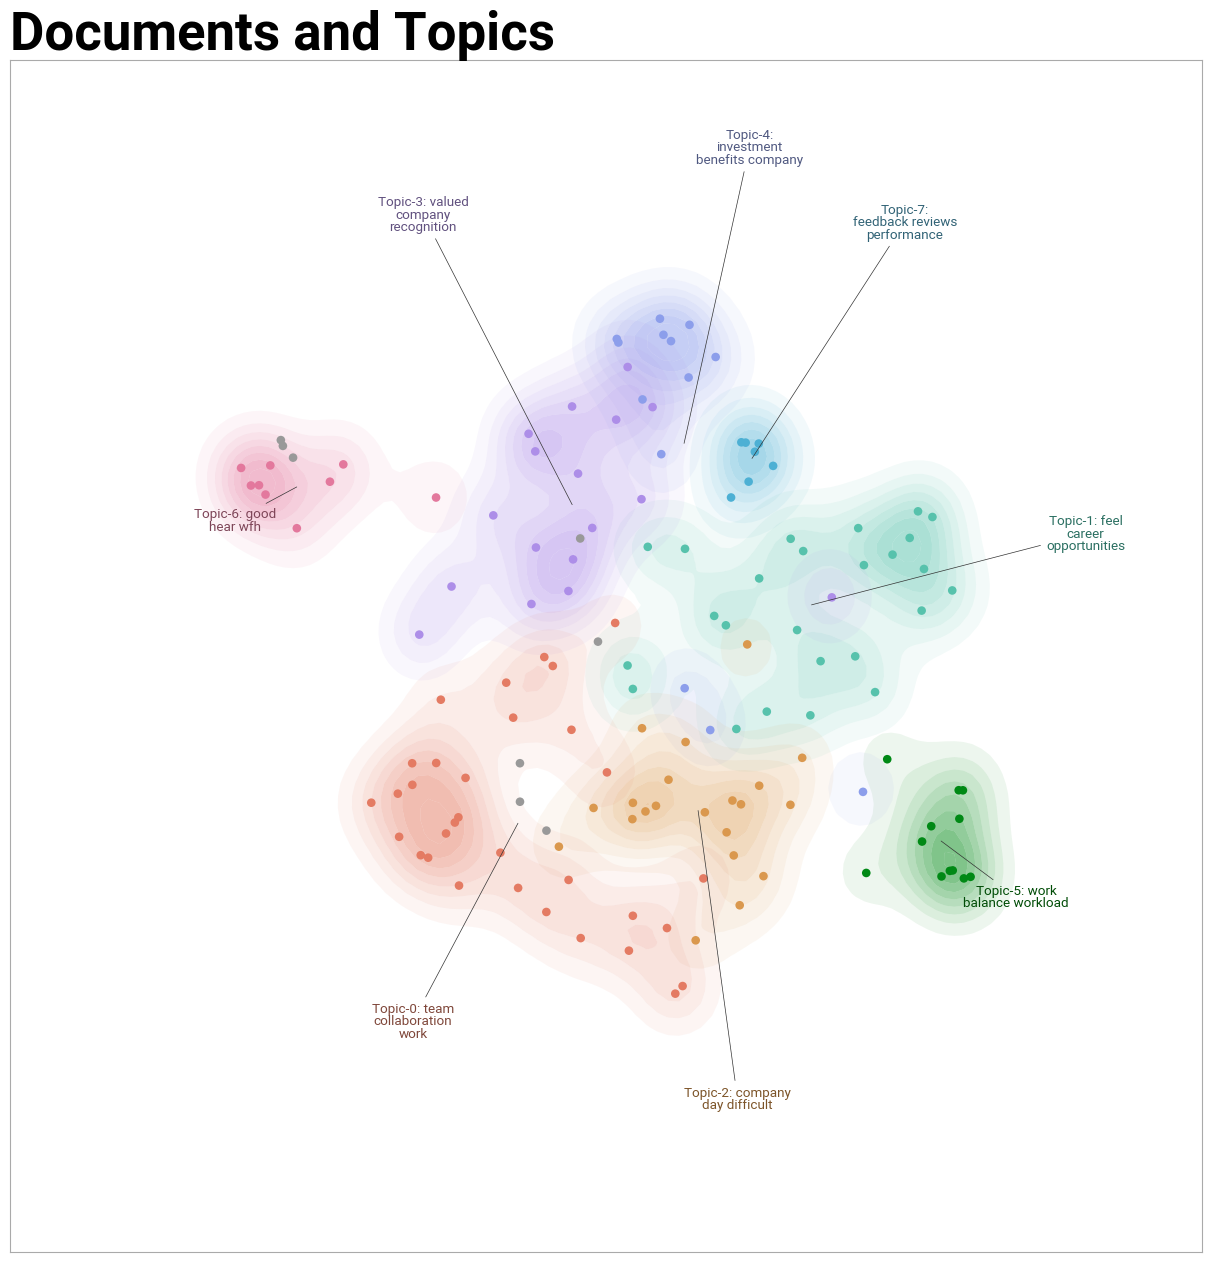

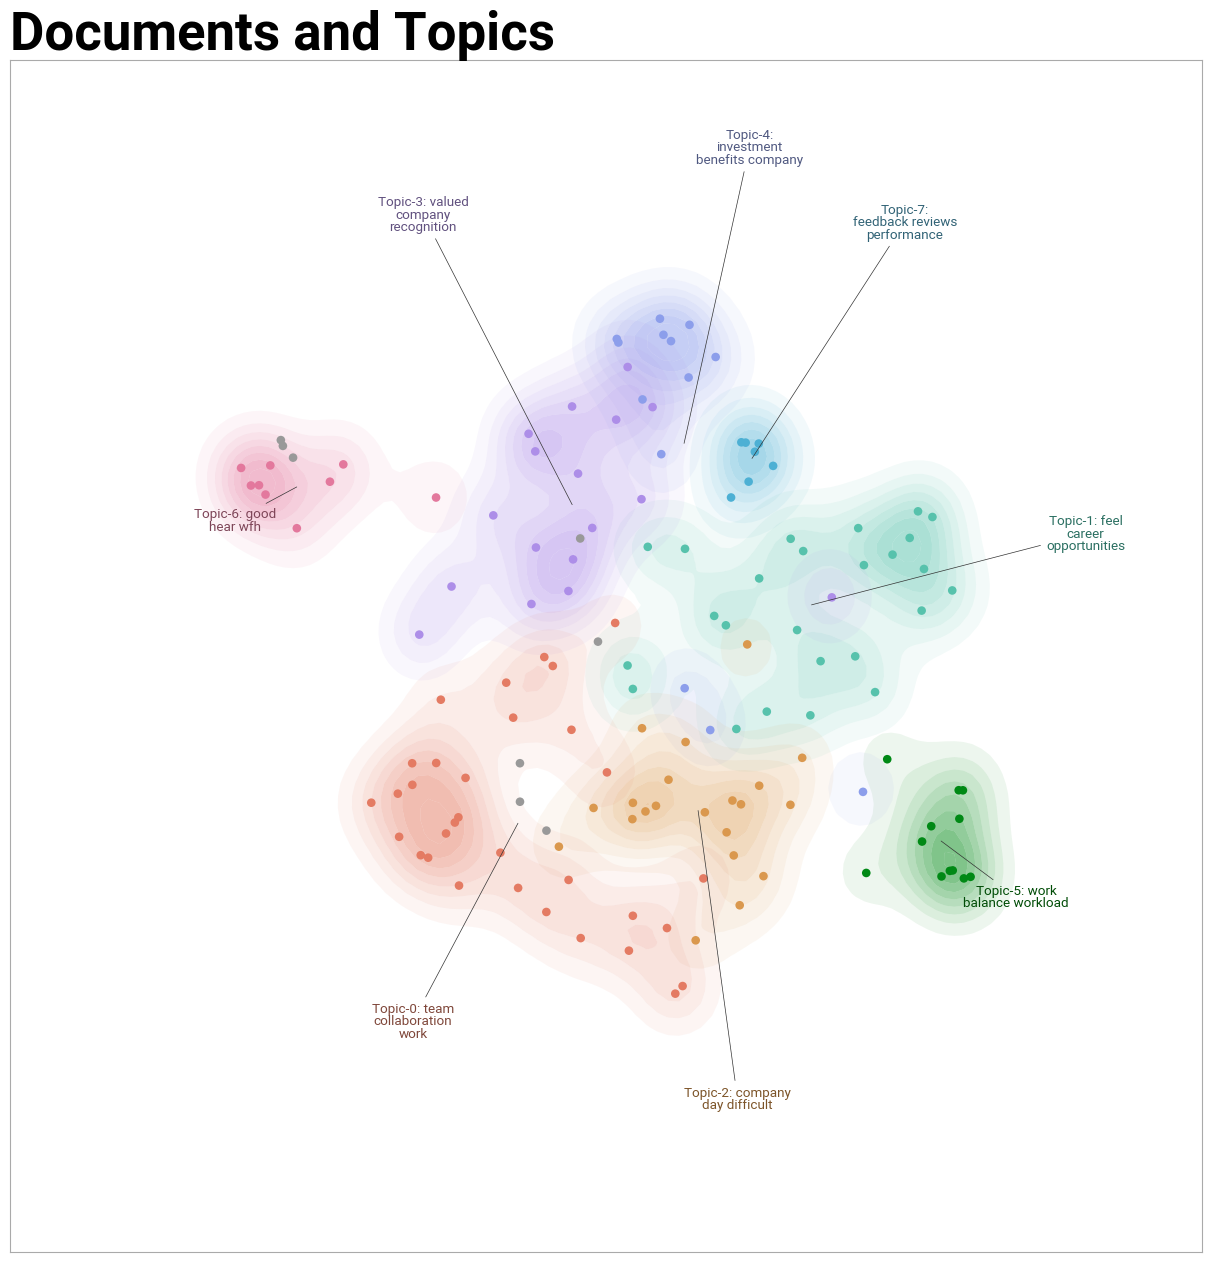

In [711]:
# with the original embeddings
topic_model.visualize_document_datamap(docs)

In [712]:
df = pd.DataFrame({"Document": docs, "Topic": topic_model.topics_})
df.head()

,Document,Topic
0,There's a culture of blame within the company ...,2
1,The company's approach to feedback and perform...,7
2,"While page limits have been set, some departme...",0
3,The culture of collaboration within our team i...,0
4,While the workload can be overwhelming at time...,5


In [713]:
df[df["Topic"] == -1]

,Document,Topic
10,\n\n,-1
11,I appreciate the company's commitment to susta...,-1
16,The leadership team is incredibly communicativ...,-1
31,Leaders provide clear direction by giving sugg...,-1
37,The open-door policy of the management and the...,-1
44,\n,-1
68,.,-1
124,Leadership effectively empowers team members t...,-1


In [714]:
# Reduce outliers using the `embeddings` strategy
new_topics = topic_model.reduce_outliers(docs, topics, strategy="embeddings", threshold=0.2)

In [715]:
vectorizer_model = CountVectorizer(stop_words="english")
#umap_model = UMAP(n_neighbors=3, n_components=5, min_dist=0.0, metric='cosine')

topic_model.update_topics(docs, topics=new_topics, vectorizer_model=vectorizer_model)

2024-11-12 12:27:05,516 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


In [716]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Zephyr,Representative_Docs
0,0,34,0_team_collaboration_members_work,"[team, collaboration, members, work, goals, sh...",[\nEmployees in this context are highly collab...,[Information is shared transparently on my tea...
1,1,25,1_feel_career_opportunities_job,"[feel, career, opportunities, job, manager, sk...",[\nTopic Label |>\n1staffairs>\nLabel|>\nPotp>...,[The company's commitment to professional deve...
2,2,22,2_company_day_feel_difficult,"[company, day, feel, difficult, lack, trust, c...",[\nTopic:\n1|>\nLabel|>\nTitle:\nPossistant|>\...,[There's a lack of transparency within the com...
3,3,19,3_valued_company_environment_work,"[valued, company, environment, work, inclusion...",[\nEmployees who value and recognize the impor...,[I appreciate the company's efforts to foster ...
4,4,13,4_investment_benefits_company_package,"[investment, benefits, company, package, like,...",[\nEmployees working with this company may exp...,[While the company offers competitive compensa...
5,5,12,5_work_balance_workload_life,"[work, balance, workload, life, hours, availab...",[\nEmployees in this context seem to vary wide...,[While the workload can be overwhelming at tim...
6,6,12,6_good_hear_wfh_comments,"[good, hear, wfh, comments, , , , , , ]","[\nFrom the given materials, it can be inferre...","[No comments., Good, good to be hear]"
7,7,7,7_feedback_reviews_performance_helpful,"[feedback, reviews, performance, helpful, year...",[\nEmployees at this company value constructiv...,[The company's approach to feedback and perfor...


In [717]:
# Run the visualization with the original embeddings
topic_model.visualize_documents(docs)

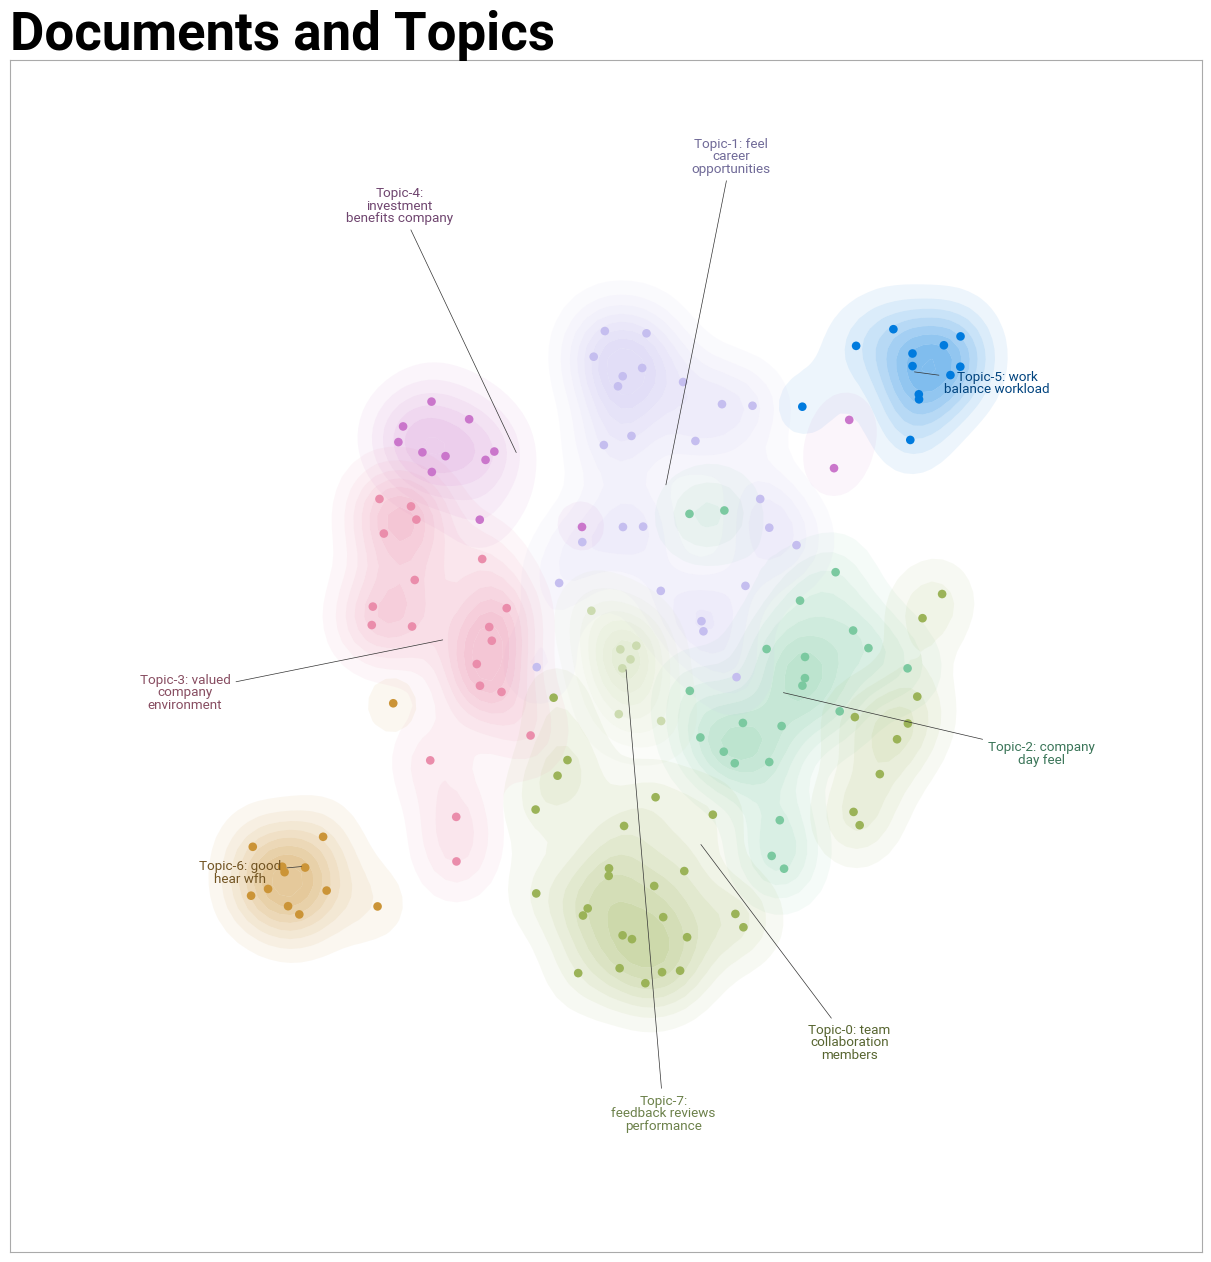

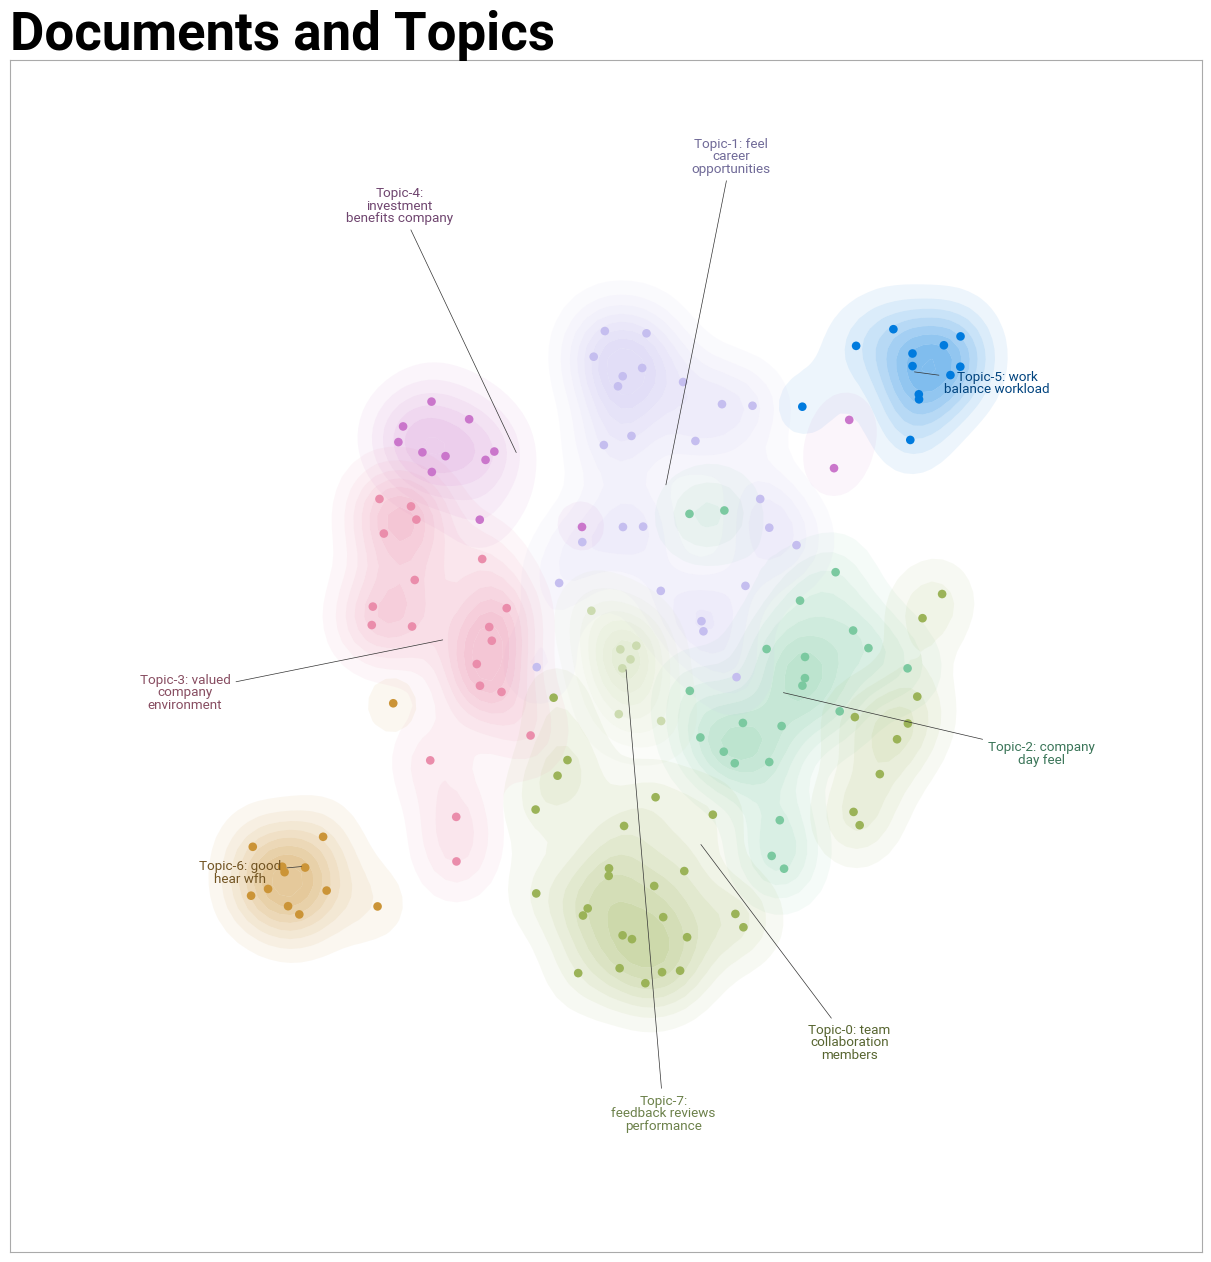

In [718]:
# with the original embeddings
topic_model.visualize_document_datamap(docs)

In [719]:
topics_per_class = topic_model.topics_per_class(docs, 
    classes=data.department)

topic_model.visualize_topics_per_class(topics_per_class, 
    top_n_topics=10, normalize_frequency = True)

In [720]:
topics_per_class = topic_model.topics_per_class(docs, 
    classes=data.department)

topic_model.visualize_topics_per_class(topics_per_class, top_n_topics=10)

In [721]:
topic_model.visualize_barchart()

In [722]:
topic_model.get_topics()

{0: [('team', 0.0880353613302401),
  ('collaboration', 0.05166246737068184),
  ('members', 0.04930962557102069),
  ('work', 0.044081307062660134),
  ('goals', 0.04157230622819063),
  ('shared', 0.04132997389654547),
  ('sense', 0.04132997389654547),
  ('culture', 0.03529328725933727),
  ('having', 0.03497763014087017),
  ('set', 0.03497763014087017)],
 1: [('feel', 0.048949709873413766),
  ('career', 0.043318750295328355),
  ('opportunities', 0.04304326130290509),
  ('job', 0.04134590285711691),
  ('manager', 0.036991581502458036),
  ('skills', 0.03659439430745448),
  ('plus', 0.03659439430745448),
  ('growth', 0.03659439430745448),
  ('like', 0.036358271455578774),
  ('motivated', 0.03465500023626268)],
 2: [('company', 0.07977080296109933),
  ('day', 0.07514694309712824),
  ('feel', 0.0564996651245736),
  ('difficult', 0.05616654899871736),
  ('lack', 0.04696683943570515),
  ('trust', 0.04199628784588054),
  ('communication', 0.04030875662553041),
  ('team', 0.040167016786710676),
  

In [723]:
text_2 = topic_model.get_representative_docs(2)

In [724]:
text_2

["There's a lack of transparency within the company, which makes it difficult to understand the company's goals and progress. I often feel disconnected from the company's vision and unsure of how my work fits into the bigger picture.",
 "A few points:\n - The company's culture is generally positive and supportive, but there are some individuals within the company who don't seem to share these values. I think more could be done to reinforce a culture of respect and teamwork.\n - I appreciate the company's commitment to work autonomy and trust in employees. However, I sometimes feel like there could be more support and guidance from my manager, especially when working on complex projects.\n - There isn't enough diversity within the company, which makes it difficult for me to feel truly valued and respected. There are very few people of color or LGBTQ+ individuals within the company, which creates a homogenous and uninspiring work environment.\n - ",
 "I appreciate the company's efforts t